<a href="https://colab.research.google.com/github/alyaridwan27/STATS-FP/blob/main/STATS_FP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

Import File

In [ ]:
train = pd.read_excel('/content/Data_Train.xlsx')

In [ ]:
train.shape

(10683, 11)

In [ ]:
train.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Checking for null values

In [ ]:
print(train.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [ ]:
train=train.dropna()

Extracting day,month,year,weekday from Date of Journey

In [ ]:
train['Journey_Day'] = pd.to_datetime(train.Date_of_Journey, format='%d/%m/%Y').dt.day
train['Journey_Month'] = pd.to_datetime(train.Date_of_Journey, format='%d/%m/%Y').dt.month
train['weekday']= pd.to_datetime(train.Date_of_Journey, format='%d/%m/%Y').dt.weekday

<ipython-input-7-8897213656f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Journey_Day'] = pd.to_datetime(train.Date_of_Journey, format='%d/%m/%Y').dt.day
<ipython-input-7-8897213656f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Journey_Month'] = pd.to_datetime(train.Date_of_Journey, format='%d/%m/%Y').dt.month
<ipython-input-7-8897213656f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [ ]:
train.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)

<ipython-input-8-32d43c3f50aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)


In [ ]:
train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'weekday'],
      dtype='object')

Converting duration into minutes

In [ ]:
def duration(test):
    test = test.strip()
    total=test.split(' ')
    to=total[0]
    hrs=(int)(to[:-1])*60
    if((len(total))==2):
        mint=(int)(total[1][:-1])
        hrs=hrs+mint
    test=str(hrs)
    return test
train['Duration']=train['Duration'].apply(duration)

<ipython-input-10-f7c50969bd0e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Duration']=train['Duration'].apply(duration)


In [ ]:
train['Duration'].nunique()

367

Extracting whether its a morning,evening,night or afternoon flight from departure time & arrival time of the flight

In [ ]:
def deparrtime(x):
    x=x.strip()
    tt=(int)(x.split(':')[0])
    if(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    elif(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'
    return x
train['Dep_Time']=train['Dep_Time'].apply(deparrtime)
train['Arrival_Time']=train['Arrival_Time'].apply(deparrtime)

Converting total_stops to 0,1,2,3 and so on..

In [ ]:
def stops(x):
    if(x=='non-stop'):
        x=str(0)
    else:
        x.strip()
        stps=x.split(' ')[0]
        x=stps
    return x
train['Total_Stops']=train['Total_Stops'].apply(stops)

In [ ]:
pd.options.mode.chained_assignment = None
for i in range(train.shape[0]):
    if(train.iloc[i]['Additional_Info']=='No info'):
        train.iloc[i]['Additional_Info']='No Info'

In [ ]:
train=train.drop(['Route'], axis=1) #we don't need it as we already have total_stops

In [ ]:
train.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,Night,170,0,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,Morning,Afternoon,445,2,No info,7662,1,5,2


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Dep_Time         10682 non-null  object
 4   Arrival_Time     10682 non-null  object
 5   Duration         10682 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Journey_Day      10682 non-null  int64 
 10  Journey_Month    10682 non-null  int64 
 11  weekday          10682 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 1.1+ MB


Changing Data Type

In [ ]:
train["Duration"] = train["Duration"].astype(int)
train["Journey_Day"] = train["Journey_Day"].astype(object)
train["Journey_Month"] = train["Journey_Month"].astype(object)
train["weekday"] = train["weekday"].astype(object)

In [ ]:
df1 =train.copy()

In [ ]:
df1["Journey_Month"]=df1["Journey_Month"].replace({3:"March",4:"April",5:"May",6:"June"}) #assigning month names

In [ ]:
df1["Journey_Month"]=df1["Journey_Month"].astype(object)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Dep_Time         10682 non-null  object
 4   Arrival_Time     10682 non-null  object
 5   Duration         10682 non-null  int64 
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Journey_Day      10682 non-null  object
 10  Journey_Month    10682 non-null  object
 11  weekday          10682 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.1+ MB


EDA

<ipython-input-23-940750b40c97>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  v1.set_xticklabels(v1.get_xticklabels(), rotation=80)


[Text(0, 0, 'March'),
 Text(1, 0, 'May'),
 Text(2, 0, 'June'),
 Text(3, 0, 'April')]

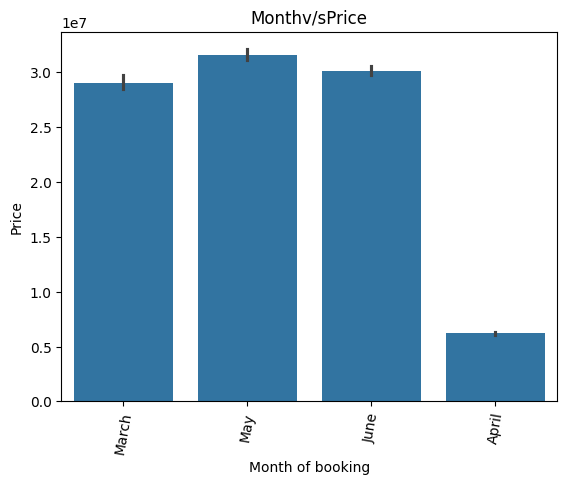

In [ ]:
#Journey month v/s total fare
v1=sns.barplot(x='Journey_Month', y='Price', data=df1,estimator=sum)
v1.set_title('Monthv/sPrice')
v1.set_ylabel('Price')
v1.set_xlabel('Month of booking')
v1.set_xticklabels(v1.get_xticklabels(), rotation=80)

In [ ]:
#count of flights per month
top_month=df1.Journey_Month.value_counts().head(10)
top_month

May      3465
June     3414
March    2724
April    1079
Name: Journey_Month, dtype: int64

**Analysis:**
As we can see that the total count of flight is maximum towards May which can also be concluded from the bar plot that the sum of fare is maximum in May.

This can be due to summer vacations for students in schools/colleges, hence most families generally go on vacations around this time of the year.

the lowest count of flights is on April. This can be caused by final exams happening in schools and colleges plus offices are the most busy on this month since it is the end of the first quarter.

In [ ]:
monthly_avg=df1.groupby(['Journey_Month']).agg({'Price':np.mean}).reset_index()

<Axes: xlabel='Journey_Month'>

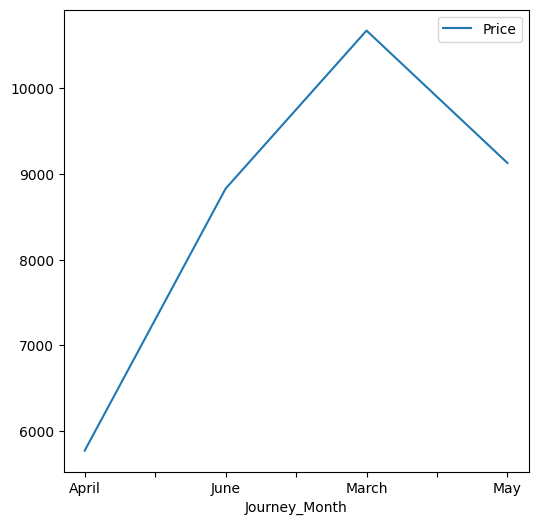

In [ ]:
#Journey month v/s Averagefare
monthly_avg.plot(x='Journey_Month',y='Price',figsize=(6,6))

**Analysis:**
the average fare price is highest on March, this can be because people usually book their flights for vacation 2-3 months prior which leads to high demand and hence higher fare prices.

<function matplotlib.pyplot.show(close=None, block=None)>

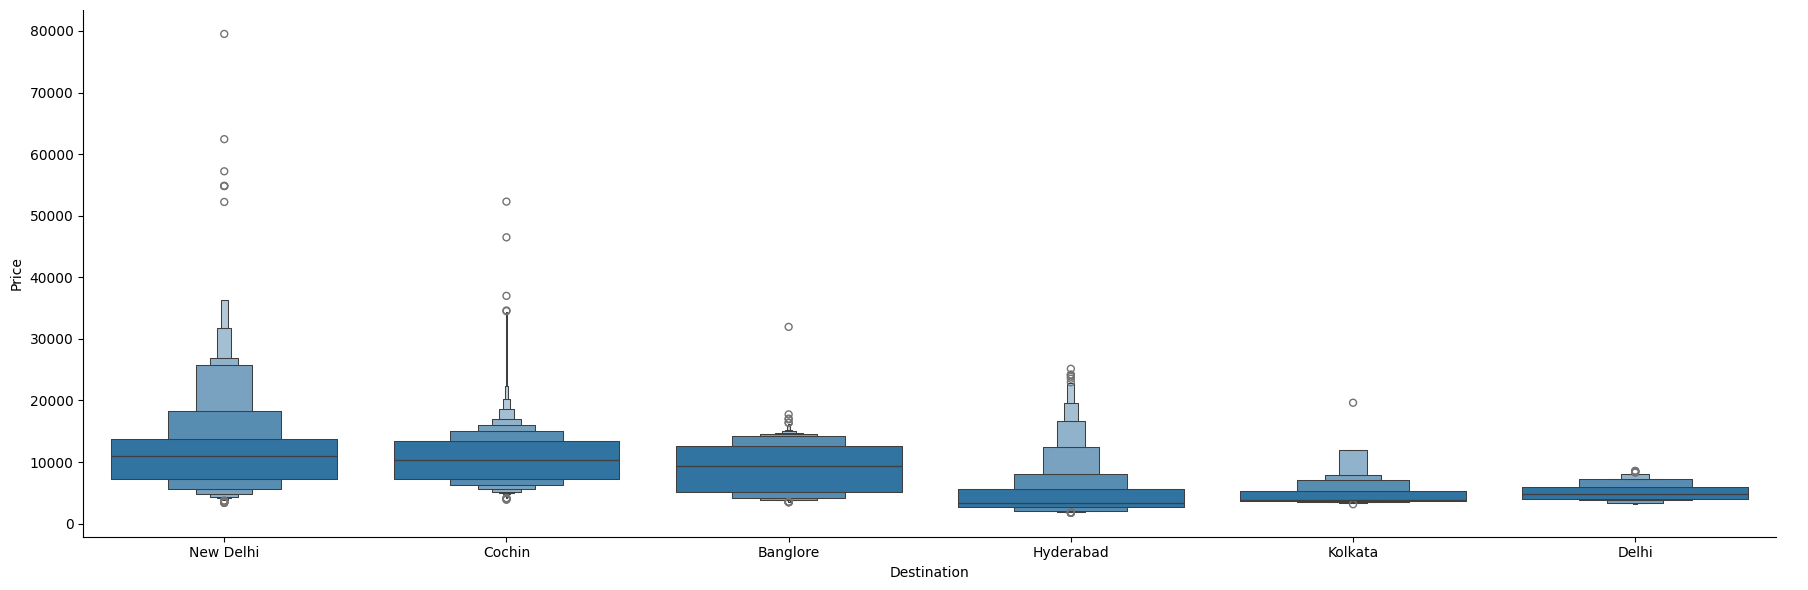

In [ ]:
# Destination vs AveragePrice
sns.catplot(y='Price',x='Destination',data= df1.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

**Analysis:**
The airfare price range in Delhi and New Delhi is the highest, this can be due to the increase in jet fuel prices in Delhi that had increased in the year of 2018 by  26.4%, but this can also be due to National Capital, political seat power and a highly visited place for vacations.

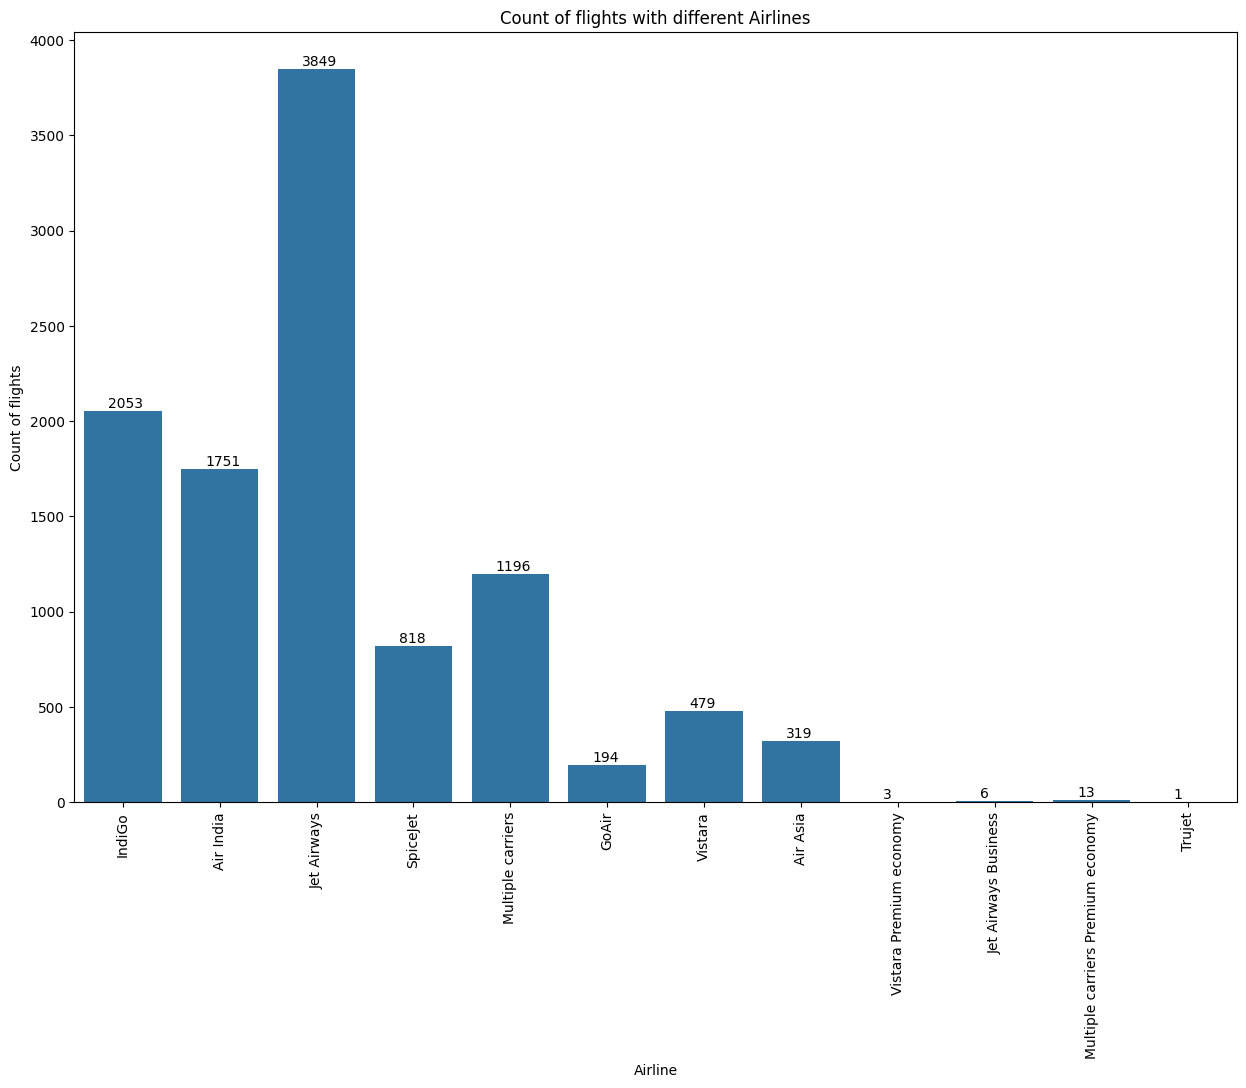

In [ ]:
#Count of flights v/s Airline
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =train)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

**Analysis:**
Apart from the first ariline almost all having similar median, we can see that jet airways has the highest price

<function matplotlib.pyplot.show(close=None, block=None)>

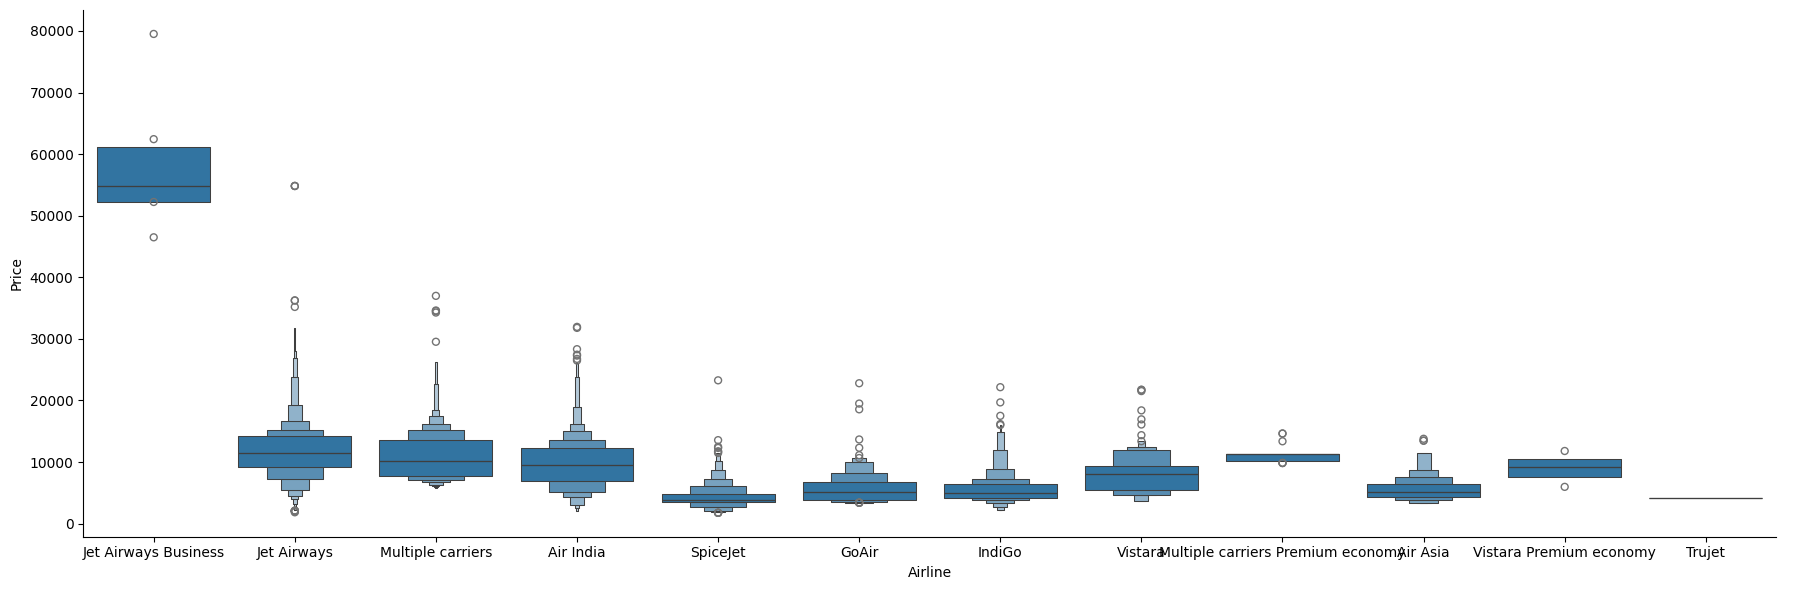

In [ ]:
# Airline vs AveragePrice
sns.catplot(y='Price',x='Airline',data= train.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

**Analysis:**
Jet Airways and Air India are full service airline and are always highlt priced due to various amenities the provided. Carriers like Indigo and SpiceJet which are low-cost have a lower and similar fare range.

<Axes: xlabel='Duration', ylabel='Price'>

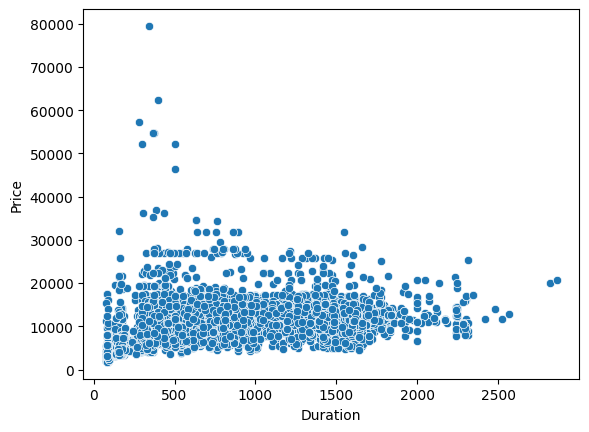

In [ ]:
#duration v/s AveragePrice
sns.scatterplot(data=train, x='Duration', y='Price')

**Analysis:**
Duration and distance plays a major role in affecting ticket prices but we don't see any pattern here, as there must be other significant factors affecting air fare like type of airline, destination of flight, date of journey of flight (higher if collides with public holiday).

<ipython-input-31-2c4e02b66c04>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  v2.set_xticklabels(v2.get_xticklabels(), rotation=80)


[Text(0, 0, 'Night'),
 Text(1, 0, 'Morning'),
 Text(2, 0, 'Evening'),
 Text(3, 0, 'Afternoon')]

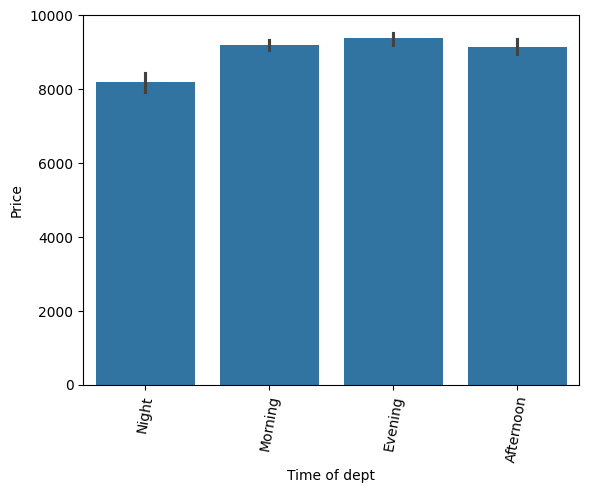

In [ ]:
#Departure time v/s AveragePrice
v2=sns.barplot(x='Dep_Time', y='Price', data=train)
v2.set_ylabel('Price')
v2.set_xlabel('Time of dept')
v2.set_xticklabels(v2.get_xticklabels(), rotation=80)

In [ ]:
# time of departure v/s count of flights
top_time=train.Dep_Time.value_counts().head(10)
top_time

Morning      4331
Evening      2829
Afternoon    2017
Night        1505
Name: Dep_Time, dtype: int64

**Analysis:**
Morning flights are always cheaper and so are midnight flight prices. Evening flight fares are expensive due to more demand and convenience in travel time.

<ipython-input-33-6b1d3615c529>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  v3.set_xticklabels(v3.get_xticklabels(), rotation=80)


[Text(0, 0, 'Night'),
 Text(1, 0, 'Afternoon'),
 Text(2, 0, 'Morning'),
 Text(3, 0, 'Evening')]

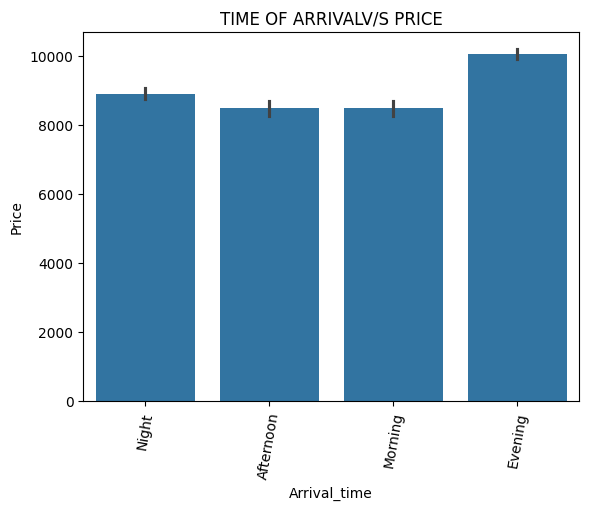

In [ ]:
#TIME OF ARRIVAL V/S average price
v3=sns.barplot(x='Arrival_Time', y='Price', data=train)
v3.set_title('TIME OF ARRIVALV/S PRICE')
v3.set_ylabel('Price')
v3.set_xlabel('Arrival_time')
v3.set_xticklabels(v3.get_xticklabels(), rotation=80)

<ipython-input-34-fd107edd7402>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  v4.set_xticklabels(v4.get_xticklabels(), rotation=80)


[Text(0, 0, '0'),
 Text(1, 0, '2'),
 Text(2, 0, '1'),
 Text(3, 0, '3'),
 Text(4, 0, '4')]

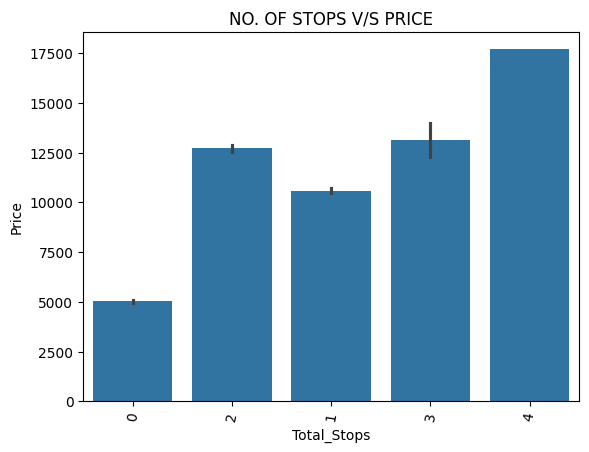

In [ ]:
#total stops v/s average price
v4=sns.barplot(x='Total_Stops', y='Price', data=train)
v4.set_title('NO. OF STOPS V/S PRICE')
v4.set_ylabel('Price')
v4.set_xlabel('Total_Stops')
v4.set_xticklabels(v4.get_xticklabels(), rotation=80)

**Analysis:**
We can see that as the number of stops increase the price also goes up this is maybe due to the resources being used for the flights.

<ipython-input-35-c50e422a6ea5>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  v4.set_xticklabels(v4.get_xticklabels(), rotation=80)


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6')]

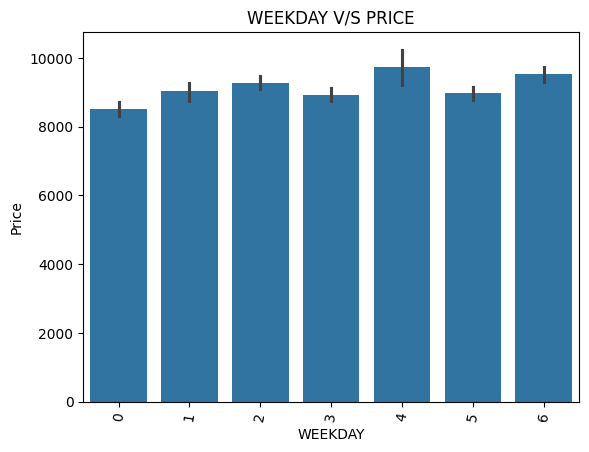

In [ ]:
#WEEKDAY V/S average price
v4=sns.barplot(x='weekday', y='Price', data=train)
v4.set_title('WEEKDAY V/S PRICE')
v4.set_ylabel('Price')
v4.set_xlabel('WEEKDAY')
v4.set_xticklabels(v4.get_xticklabels(), rotation=80)

**Analysis:**
Prices are higher on firday, this may be because when airlines start rising prices to make up for the lower prices before and also because weekdays are off for most people so they are mostly travelling to or travelling back.

In [ ]:
train["Journey_Day"].unique()

array([24, 1, 9, 12, 27, 18, 3, 15, 6, 21], dtype=object)

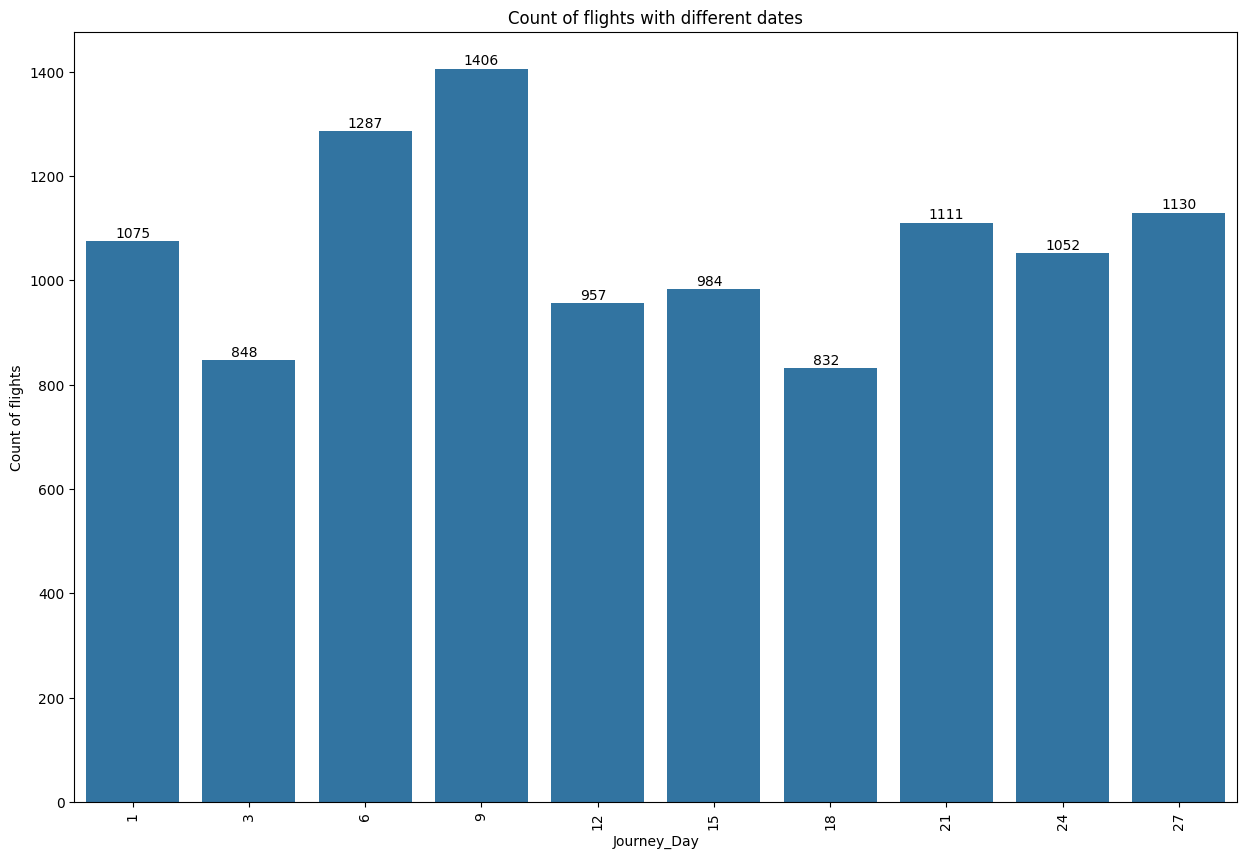

In [ ]:
#Count of flights with different dates
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different dates')
ax=sns.countplot(x = 'Journey_Day', data =train)
plt.xlabel('Journey_Day')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

<ipython-input-38-476f10b7a104>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  v5.set_xticklabels(v5.get_xticklabels(), rotation=80)


[Text(0, 0, '1'),
 Text(1, 0, '3'),
 Text(2, 0, '6'),
 Text(3, 0, '9'),
 Text(4, 0, '12'),
 Text(5, 0, '15'),
 Text(6, 0, '18'),
 Text(7, 0, '21'),
 Text(8, 0, '24'),
 Text(9, 0, '27')]

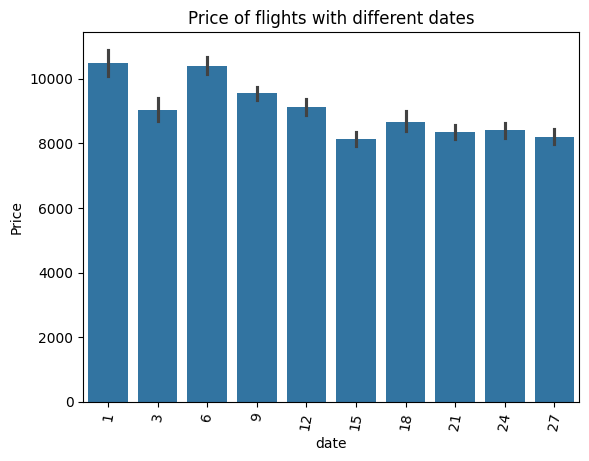

In [ ]:
#Journey_Day v/s Average price
v5=sns.barplot(x='Journey_Day', y='Price', data=train)
v5.set_title('Price of flights with different dates')
v5.set_ylabel('Price')
v5.set_xlabel('date')
v5.set_xticklabels(v5.get_xticklabels(), rotation=80)

**Analysis:**
We can see that there is a trend in the air fare when compared to the day of respective months, prices are higher in the start of the month but this is not a tredn of you see from the broader perspectives as this might be due to various reasons. For example, the date of journey is 10th March and people are booking towards 5th March or so, this will lead to higher flight prices (prices increase when you book near the date of journey). So flight prices do not follow any particular pattern towards any time of the month.

**Pearson Correlation Test**

Pearson correlation coefficient : To check the linear association between the target variable and independent continuous variable.(this condition needs to be met)

H0: Two variables are not correlated

H1: Two variables are correlated

if p-value < 0.05, then we reject the null hypothesis and accept the H1, saying they are correlated.

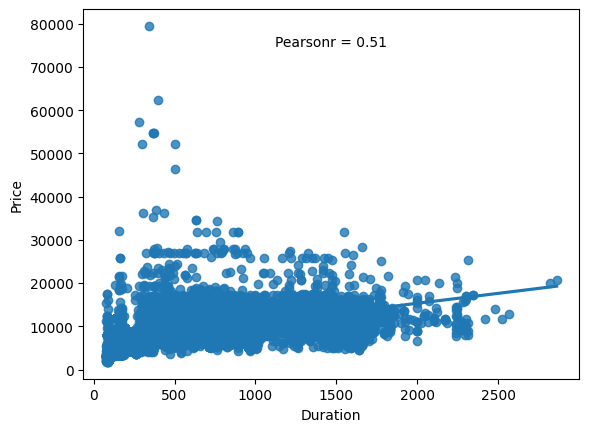

In [ ]:
import scipy.stats as stats
sns.regplot(x='Duration', y='Price', data=train)
plt.annotate(f"Pearsonr = {stats.pearsonr(train['Duration'], train['Price'])[0]:.2f}", xy=(0.5, 0.9), xycoords="axes fraction", fontsize=10, ha='center')
plt.show()

We get p-value < 0.05, hence we accept H1 and say the target variable and continuous independent variable are correlated. r = 0.51 says they are moderately related.

In [ ]:
# Import label encoder
colnames = list(train.columns)
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

for col in colnames:
    if train[col].dtype==object:
        train[col]= label_encoder.fit_transform(train[col])

In [ ]:
cat_var=["Airline","Source","Destination","Dep_Time","Arrival_Time","Total_Stops","Additional_Info","Journey_Day","Journey_Month","weekday"]
catdf=train[cat_var]

In [ ]:
catdf.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Journey_Day,Journey_Month,weekday
0,3,0,5,3,3,0,8,8,0,6
1,1,3,0,2,0,2,8,0,2,2


**Comparison Test**

**Anova test**

It is carried out to compare between each groups in a categorical variable.

ANOVA only lets us know the means for different groups are same or not. It doesn’t help us identify which mean is different.

Hypothesis testing :

H0: means of all levels of the categorical variable is same

H1: mean of at least one level is different

If p-value < 0.05 then we reject the null hypothesis.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Price ~ C(Dep_Time)+C(weekday)+C(Additional_Info)',data=train).fit()
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Dep_Time),3.0,1.518840e+09,5.062801e+08,26.771397,3.043635e-17
C(weekday),6.0,1.469442e+09,2.449070e+08,12.950347,1.209048e-14
C(Additional_Info),9.0,2.250749e+10,2.500832e+09,132.240577,3.013247e-237
Residual,10663.0,2.016505e+11,1.891123e+07,NaN,NaN


In [ ]:
probanova=list(aov_table["PR(>F)"])

In [ ]:
for i in range(0,4):
    if probanova[i]>0.05:
        print(i)

As p-value<0.05 for all the variables, we reject H0 and hence no variables are removed